## Price to Trailing 12-Month Cashflows

[Reference](https://www.quantopian.com/lectures/case-study-traditional-value-factor)

This is calculated as a simple ratio between price per share and TTM free cashflow  (here using the built-in Morningstar valuation ratio as an approximaton).

This ratio serves a similar function to the previous two. A future notebook will explore the subtle differences in these metrics, but they largely serve the same purpose. Once again, low values are attractive and high values are unattractive, so the metric must be inverted.

In [1]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import CustomFactor
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.filters.morningstar import Q1500US

In [2]:
# Custom Factor 4 : Price to Trailing 12 Month Cashflow
class Price_to_TTM_Cashflows(CustomFactor):
    inputs = [morningstar.valuation_ratios.pcf_ratio]
    window_length = 1
    
    def compute(self, today, assets, out, pcf):
        out[:] = -pcf[-1] 
        
class Price_to_Book(CustomFactor):

    inputs = [morningstar.valuation_ratios.pb_ratio]
    window_length = 1

    def compute(self, today, assets, out, pbr):
        out[:] = pbr[-1]
        
# Custom Factor 1 : Dividend Yield
class Div_Yield(CustomFactor):

    inputs = [morningstar.valuation_ratios.dividend_yield]
    window_length = 1

    def compute(self, today, assets, out, d_y):
        out[:] = d_y[-1]

        
        
def make_pipeline():
    
    pipe = Pipeline(
        columns={
            'Price_to_TTM_Cashflows': Price_to_TTM_Cashflows(),
        },
        screen=Q1500US()

    )

    return pipe

In [3]:
result = run_pipeline(make_pipeline(), start_date='2013-12-01', end_date='2014-12-01')

In [4]:
result.head()

Price_to_TTM_Cashflows
2013-12-02 00:00:00+00:00 Equity(2 [ARNC])                  -6.5574
                          Equity(24 [AAPL])                 -9.6525
                          Equity(41 [ARCB])                 -8.1367
                          Equity(62 [ABT])                 -18.8679
                          Equity(67 [ADSK])                -19.3798

In [5]:
result.columns

Index([u'Price_to_TTM_Cashflows'], dtype='object')

In [6]:
result.mean(level=0)

,Price_to_TTM_Cashflows
2013-12-02 00:00:00+00:00,-43.194210
2013-12-03 00:00:00+00:00,-43.194210
2013-12-04 00:00:00+00:00,-43.194210
2013-12-05 00:00:00+00:00,-43.211648
2013-12-06 00:00:00+00:00,-43.220991
2013-12-09 00:00:00+00:00,-43.235310
2013-12-10 00:00:00+00:00,-43.235310
2013-12-11 00:00:00+00:00,-43.235310
2013-12-12 00:00:00+00:00,-43.235310
2013-12-13 00:00:00+00:00,-43.235310


In [7]:
tmp = result.copy()

In [8]:
tmp = tmp.reset_index()
tmp.head()

,level_0,level_1,Price_to_TTM_Cashflows
0,2013-12-02 00:00:00+00:00,Equity(2 [ARNC]),-6.5574
1,2013-12-02 00:00:00+00:00,Equity(24 [AAPL]),-9.6525
2,2013-12-02 00:00:00+00:00,Equity(41 [ARCB]),-8.1367
3,2013-12-02 00:00:00+00:00,Equity(62 [ABT]),-18.8679
4,2013-12-02 00:00:00+00:00,Equity(67 [ADSK]),-19.3798


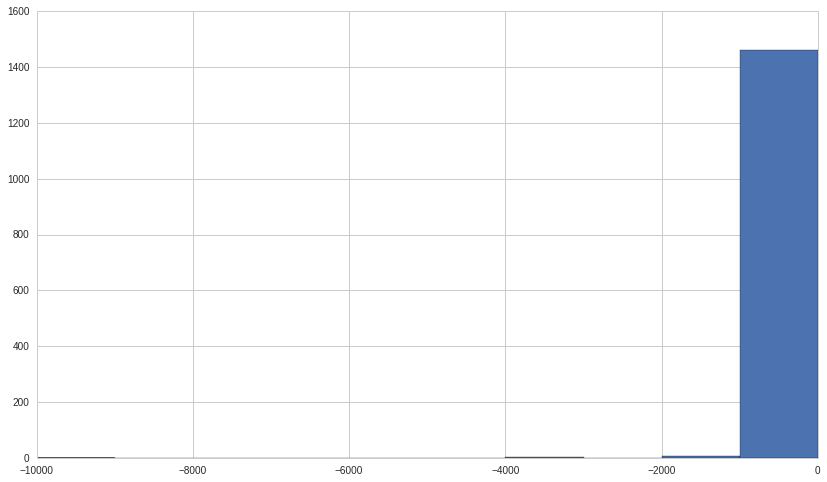

In [9]:
tmp[tmp.level_0 == '2013-12-02']['Price_to_TTM_Cashflows'].hist();

In [10]:
res = tmp[tmp.level_0 == '2013-12-02']['Price_to_TTM_Cashflows']

In [11]:
res.dropna().describe()

count     1472.000000
mean       -43.194210
std        315.223474
min     -10000.000000
25%        -19.607800
50%        -13.386900
75%         -8.613300
max         -0.573600
Name: Price_to_TTM_Cashflows, dtype: float64

***

In [12]:
assets = result.index.levels[1].unique()

In [13]:
pricing = get_pricing(assets, start_date='2013-12-01', end_date='2015-02-01', fields='open_price')

In [14]:
import alphalens

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated and will be removed in the future. Please use the new API instead.
  after removing the cwd from sys.path.


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-12548.716548,-32.916122,-261.427807,795.584824,36769,10.041812
2,-39.911054,-20.694074,-27.874724,3.962532,36661,10.012317
3,-23.696700,-16.954161,-20.081477,1.303948,36596,9.994565
4,-19.382581,-14.721167,-16.915369,0.833355,36740,10.033892
5,-16.671251,-12.709409,-14.730789,0.697537,36507,9.970259
6,-14.623351,-11.083778,-12.782015,0.607786,36537,9.978452
7,-12.511849,-9.380900,-11.004588,0.619621,36582,9.990742
8,-10.570800,-7.443800,-9.003625,0.658142,36555,9.983368
9,-8.410400,-5.256587,-6.860610,0.688095,36535,9.977906


Returns Analysis


,5,10,20
Ann. alpha,0.155,0.130,0.119
beta,-0.235,-0.220,-0.248
Mean Period Wise Return Top Quantile (bps),-25.403,-55.569,-106.948
Mean Period Wise Return Bottom Quantile (bps),-17.523,-35.545,-68.660
Mean Period Wise Spread (bps),-1.583,-2.034,-1.935


/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/pl

Information Analysis


,5,10,20
IC Mean,0.012,0.014,0.020
IC Std.,0.107,0.121,0.141
t-stat(IC),1.743,1.893,2.232
p-value(IC),0.083,0.060,0.026
IC Skew,1.101,1.279,1.404
IC Kurtosis,1.172,1.109,0.990
Ann. IR,1.743,1.893,2.232


/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:215: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


Turnover Analysis


,5,10,20
Quantile 1 Mean Turnover,0.033,0.059,0.108
Quantile 2 Mean Turnover,0.072,0.123,0.213
Quantile 3 Mean Turnover,0.107,0.176,0.299
Quantile 4 Mean Turnover,0.131,0.217,0.369
Quantile 5 Mean Turnover,0.139,0.233,0.394
Quantile 6 Mean Turnover,0.138,0.232,0.395
Quantile 7 Mean Turnover,0.125,0.211,0.363
Quantile 8 Mean Turnover,0.101,0.172,0.299
Quantile 9 Mean Turnover,0.076,0.130,0.227
Quantile 10 Mean Turnover,0.034,0.061,0.111


,5,10,20
Mean Factor Rank Autocorrelation,0.993,0.987,0.974


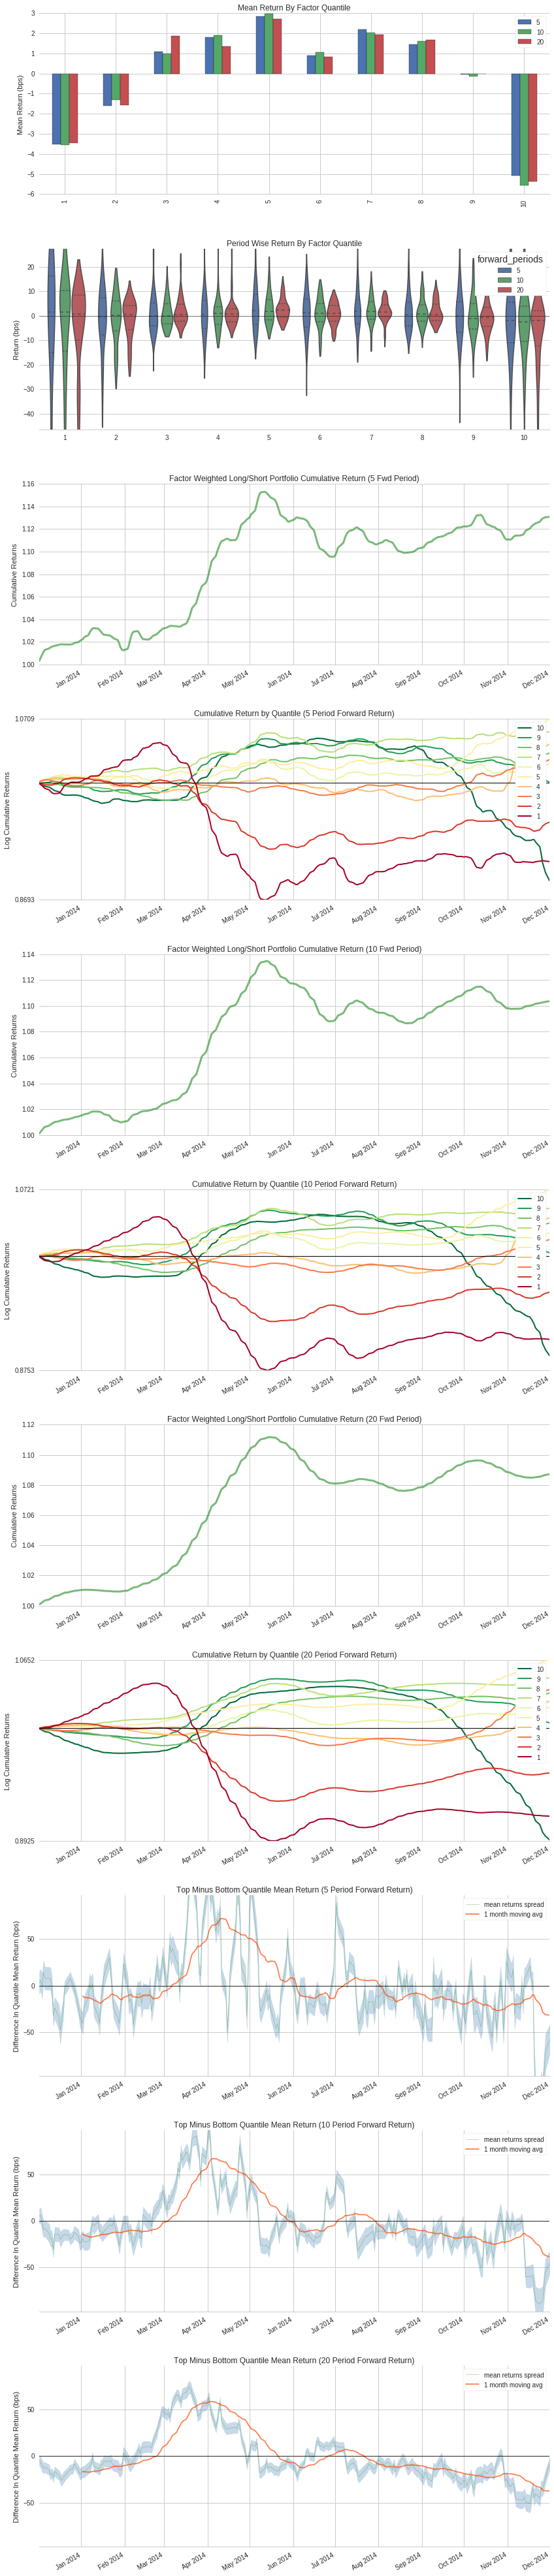

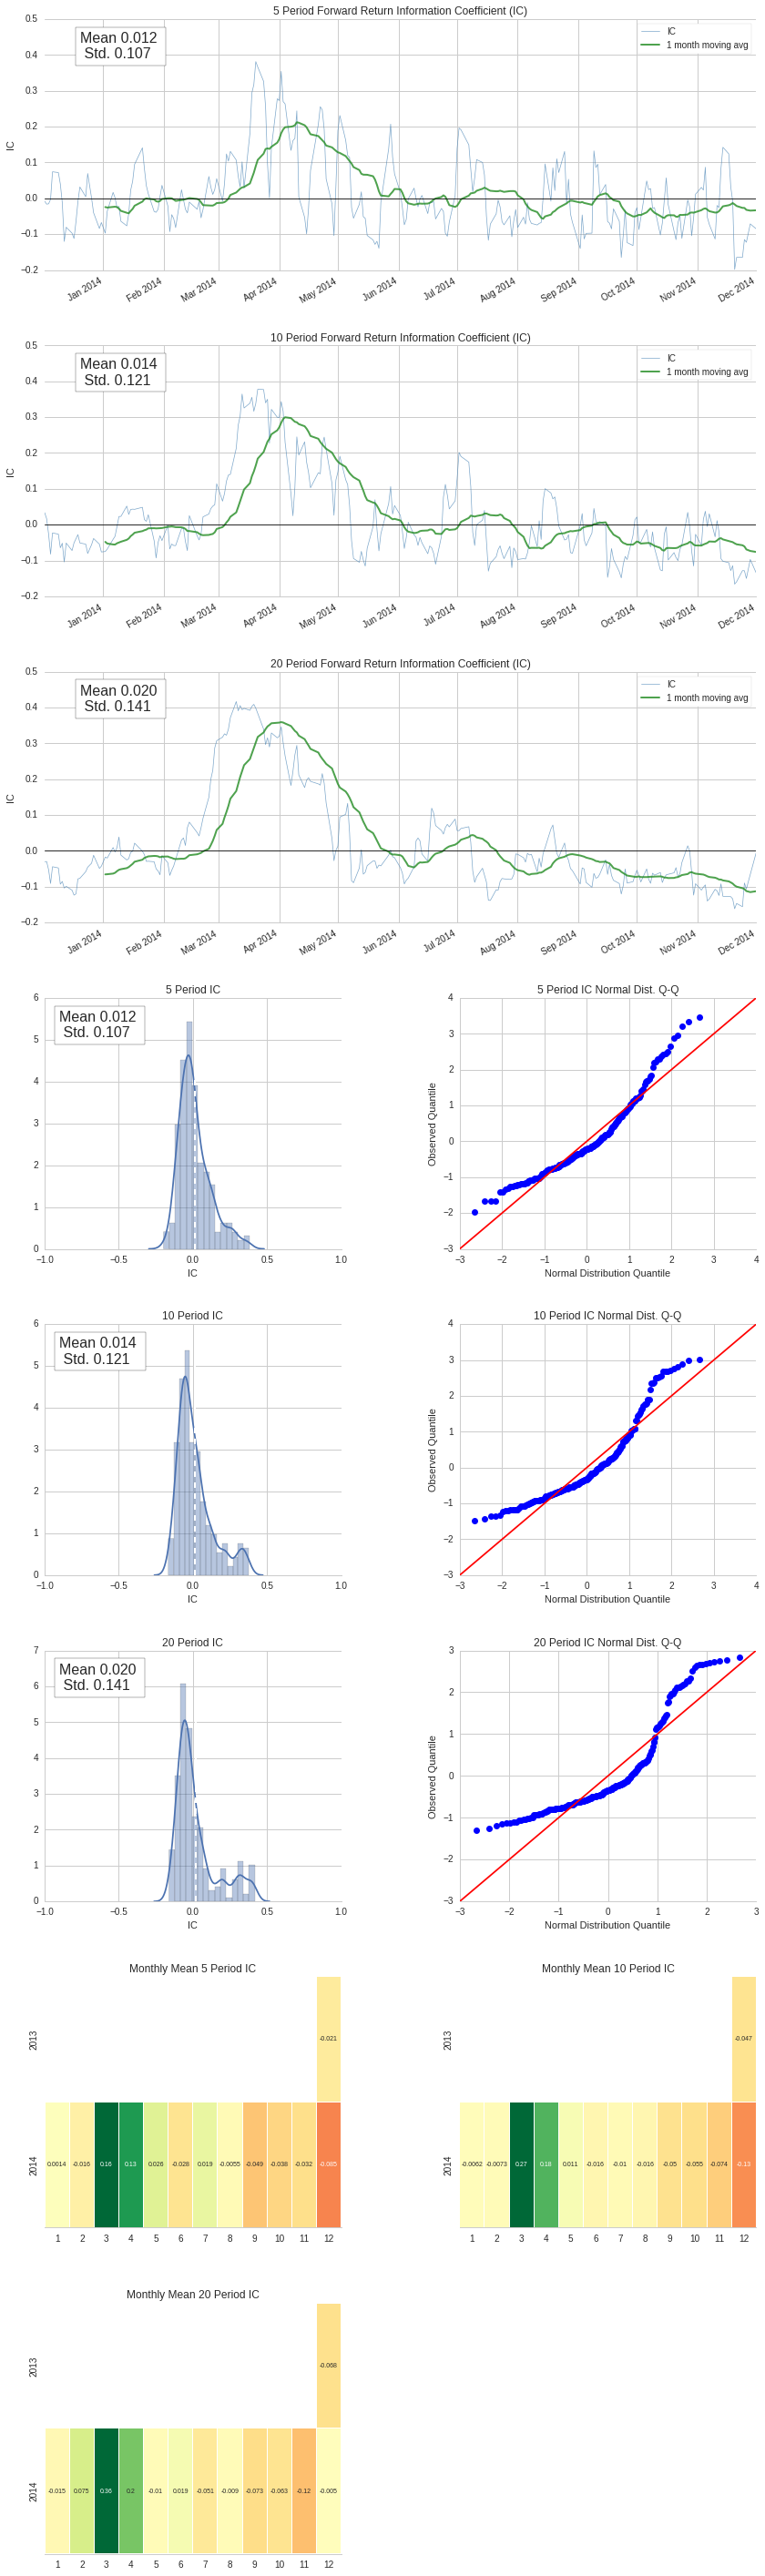

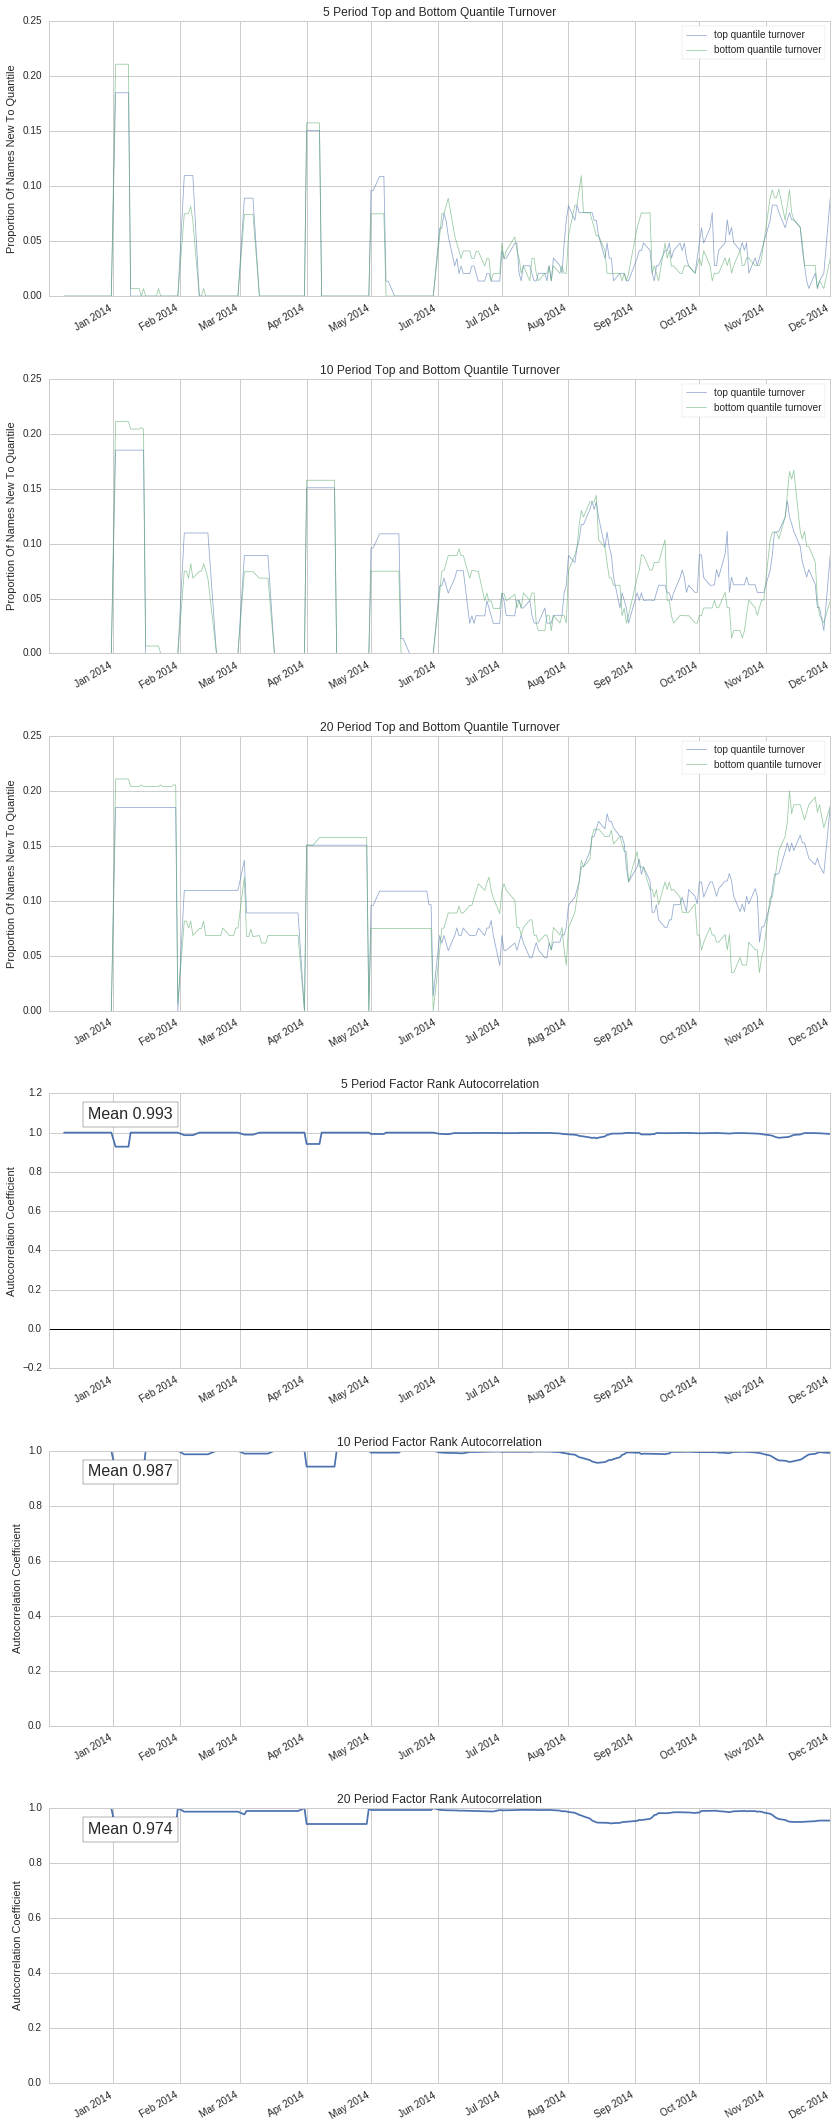

In [15]:
alphalens.tears.create_factor_tear_sheet(factor=result['Price_to_TTM_Cashflows'],
                                         prices=pricing,
                                         quantiles=10,
                                         periods=(5,10,20))

***